In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

Load and explore the dataset structure, data types, and missing values

In [2]:
df=pd.read_csv('../DataSets/Fleet Data.csv')
df

,Parent Airline,Airline,Aircraft Type,Current,Future,Historic,Total,Orders,Unit Cost,Total Cost (Current),Average Age
0,Aegean Airlines,Aegean Airlines,Airbus A319,1.0,NaN,3.0,4.0,NaN,$90,$90,11.6
1,Aegean Airlines,Olympic Air,Airbus A319,NaN,NaN,8.0,8.0,NaN,$90,$0,NaN
2,Aegean Airlines,Aegean Airlines,Airbus A320,38.0,NaN,3.0,41.0,NaN,$98,"$3,724",7.5
3,Aegean Airlines,Olympic Air,Airbus A320,NaN,NaN,9.0,9.0,NaN,$98,$0,NaN
4,Aegean Airlines,Aegean Airlines,Airbus A321,8.0,NaN,NaN,8.0,NaN,$115,$919,10.3
...,...,...,...,...,...,...,...,...,...,...,...
1578,WestJet,WestJet,Boeing 757,NaN,NaN,1.0,1.0,NaN,$73,$0,NaN
1579,WestJet,WestJet,Boeing 767,4.0,NaN,NaN,4.0,NaN,$187,$748,24.5
1580,WestJet,WestJet Encore,De Havilland Canada DHC-8 Dash 8,33.0,NaN,NaN,33.0,9.0,$31,"$1,033",2.0
1581,Wizz Air,Wizz Air,Airbus A320,63.0,NaN,9.0,72.0,8.0,$98,"$6,174",5.1


In [3]:
df.dtypes

Parent Airline           object
Airline                  object
Aircraft Type            object
Current                 float64
Future                  float64
Historic                float64
Total                   float64
Orders                  float64
Unit Cost                object
Total Cost (Current)     object
Average Age             float64
dtype: object

In [ ]:
#info() helps understand the structure of a DataFrame by summarizing its columns, data types, and memory usage

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583 entries, 0 to 1582
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Parent Airline        1583 non-null   object 
 1   Airline               1583 non-null   object 
 2   Aircraft Type         1583 non-null   object 
 3   Current               859 non-null    float64
 4   Future                188 non-null    float64
 5   Historic              1113 non-null   float64
 6   Total                 1484 non-null   float64
 7   Orders                348 non-null    float64
 8   Unit Cost             1548 non-null   object 
 9   Total Cost (Current)  1556 non-null   object 
 10  Average Age           820 non-null    float64
dtypes: float64(6), object(5)
memory usage: 136.2+ KB


Clean the data by handling missing values 

In [5]:
#We are using the replace() function to remove the gaps between words.

In [6]:
df.columns=df.columns.str.replace(' ','_',regex=True).astype('object')
df.columns

Index(['Parent_Airline', 'Airline', 'Aircraft_Type', 'Current', 'Future',
       'Historic', 'Total', 'Orders', 'Unit_Cost', 'Total_Cost_(Current)',
       'Average_Age'],
      dtype='object')

In [7]:
#We are checking for null values in each column using the isnull().sum() method.

In [113]:
df.isnull().sum()

Parent_Airline    0
Airline           0
Aircraft_Type     0
Current           0
Future            0
Historic          0
Total             0
Orders            0
Unit_Cost         0
Total_Cost        0
Average_Age       0
dtype: int64

In [114]:
df['Orders'].fillna('unknown',inplace=True)
df['Current'].fillna('unknown',inplace=True)
df['Historic'].fillna('unknown',inplace=True)
df['Total'].fillna('unknown',inplace=True)
df['Total_Cost'].fillna('unknown',inplace=True)
df['Average_Age'].fillna('unknown',inplace=True)
df['Unit_Cost'].fillna('unknown',inplace=True)
df['Future'].fillna('unknown',inplace=True)

In [10]:
df.columns

Index(['Parent_Airline', 'Airline', 'Aircraft_Type', 'Current', 'Future',
       'Historic', 'Total', 'Orders', 'Unit_Cost', 'Total_Cost_(Current)',
       'Average_Age'],
      dtype='object')

In [11]:
# We use the unique() method to inspect the column for unexpected or problematic values.

In [12]:
df.Parent_Airline.unique()

array(['Aegean Airlines', 'Aeroflot', 'Aerolineas Argentinas',
       'Air Algerie', 'Air Arabia', 'Air Astana', 'Air Berlin',
       'Air Canada', 'Air China', 'Air Europa', 'Air France/KLM',
       'Air India', 'Air Malta', 'Air Mauritius', 'Air Namibia',
       'Air New Zealand', 'Air Transat', 'Air Transport International',
       'Air Transport Services', 'Air Wisconsin', 'AirAsia',
       'Alaska Airlines', 'Alitalia', 'All Nippon Airways',
       'Allegiant Air', 'American Airlines', 'Asiana Airlines',
       'Atlas Air', 'Avianca', 'Azul', 'Cathay Pacific',
       'Cebu Pacific Air', 'China Airlines', 'China Eastern Airlines',
       'China Southern Airlines', 'Copa Airlines', 'Delta Airlines',
       'easyJet', 'EgyptAir', 'El Al', 'Emirates', 'Ethiopian Airlines',
       'Etihad Airways', 'EVA Air', 'FedEx Express', 'Finnair', 'Flybe',
       'FlyDubai', 'Frontier Airlines', 'Garuda Indonesia',
       'Gol Linhas Aéreas', 'Grupo Aeromexico', 'Gulf Air',
       'Hainan Airline

In [13]:
#We use the replace() method to clean the data by replacing unwanted words 

In [14]:
df.Parent_Airline=df.Parent_Airline.replace('Air France/KLM','Air France')

In [15]:
# We use the unique() function to examine the column for any irregular or unexpected values.

In [16]:
df.Airline.unique()

array(['Aegean Airlines', 'Olympic Air', 'Aeroflot', 'Rossiya Airlines',
       'Aurora Airlines', 'Pobeda', 'Aerolineas Argentinas',
       'Austral Líneas Aéreas', 'Air Algerie', 'Air Arabia',
       'Air Arabia Egypt', 'Air Arabia Jordan', 'Air Arabia Maroc',
       'Air Astana', 'Air Berlin', 'Air Canada', 'Air Canada Jetz',
       'Air Canada Rouge', 'Air Canada Regional', 'Air Macau (66.9%)',
       'Air China', 'Shenzhen Airlines', 'Shandong Airlines (51%)',
       'Air China Inner Mongolia', 'Kunming Airlines (80%)',
       'Dalian Airlines (80%)', 'Air China Cargo', 'Air Europa',
       'Air France', 'Transavia', 'KLM', 'Martinair', 'Transavia France',
       'HOP!', 'KLM Cityhopper', 'Air India', 'Air India Regional',
       'Air India Express', 'Air Malta', 'Air Mauritius', 'Air Namibia',
       'Air New Zealand', 'Air New Zealand Link', 'Air Transat',
       'Air Transport International', 'ABX Air', 'Air Wisconsin',
       'AirAsia', 'AirAsia India', 'AirAsia Japan', 'Thai 

In [17]:
# Here, we are cleaning the data by replacing the words 'percentage' using the replace() function.

In [18]:
df.Airline=df.Airline.replace('Air Macau (66.9%)','Air Macau')
df.Airline=df.Airline.replace('Shandong Airlines (51%)','Shandong Airlines')
df.Airline=df.Airline.replace('Kunming Airlines (80%)','Kunming Airlines')
df.Airline=df.Airline.replace('Dalian Airlines (80%)','Dalian Airlines')
df.Airline=df.Airline.replace('Avianca El Salvador/TACA Airlines','Avianca El Salvador')
df.Airline=df.Airline.replace('Tigerair Taiwan (80%)','Tigerair Taiwan')
df.Airline=df.Airline.replace('Mandarin Airlines (93.99%)','Mandarin Airlines')
df.Airline=df.Airline.replace('easyJet - Switzerland','Switzerland')
df.Airline=df.Airline.replace('Lucky Air (86.68%)','Lucky Air')
df.Airline=df.Airline.replace('Capital Airlines (70%)','Capital Airlines')
df.Airline=df.Airline.replace('China Xinhua Airlines (100%)','China Xinhua Airlines (100%)')
df.Airline=df.Airline.replace('Urumqi Airlines (70%)','Urumqi Airlines (70%)')
df.Airline=df.Airline.replace('Chang An Airlines (67.01%','Chang An Airlines')
df.Airline=df.Airline.replace('Air Nostrum/Iberia Regional','Air Nostrum')
df.Airline=df.Airline.replace('Japan Air Commuter (60% owned)','Japan Air Commuter')
df.Airline=df.Airline.replace('Japan Transocean Air (72.8%)','Japan Transocean Air')
df.Airline=df.Airline.replace('Hokkaido Air System (57.3%)','Hokkaido Air system')
df.Airline=df.Airline.replace('Anadolujet (100%)','Anadolujet')
df.Airline=df.Airline.replace('UTair-Cargo','Cargo')

In [19]:
# This process checks whether the dataset contains any duplicate records.

In [20]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1578    False
1579    False
1580    False
1581    False
1582    False
Length: 1583, dtype: bool

In [21]:
#dtypes helps us understand the type of data stored in each column of the DataFrame

In [22]:
df.dtypes

Parent_Airline          object
Airline                 object
Aircraft_Type           object
Current                 object
Future                  object
Historic                object
Total                   object
Orders                  object
Unit_Cost               object
Total_Cost_(Current)    object
Average_Age             object
dtype: object

In [23]:
#we are using unique function for anaylizing, is there any error or any mistakes in any column 

In [24]:
df.Aircraft_Type.unique()

array(['Airbus A319', 'Airbus A320', 'Airbus A321', 'ATR 42/72',
       'Boeing 737', 'British Aerospace BAe 146/Avro RJ',
       'De Havilland Canada DHC-8 Dash 8', 'Airbus A310', 'Airbus A330',
       'Airbus A350', 'Antonov An-124', 'Antonov An-148/An-158',
       'Boeing 747', 'Boeing 767', 'Boeing 777', 'Boeing 787',
       'Ilyushin Il-62', 'Ilyushin Il-96', 'Irkut MC-21',
       'McDonnell Douglas DC-10', 'McDonnell Douglas MD-11',
       'Sukhoi Superjet 100', 'Tupolev Tu-134', 'Tupolev Tu-154',
       'Tupolev Tu-204', 'Tupolev Tu-214',
       'Viking Air DHC 6-400 Twin Otter', 'Yakovlev Yak-42',
       'Airbus A340', 'Boeing 757', 'Embraer ERJ-190',
       'McDonnell Douglas DC-9', 'McDonnell Douglas MD-80', 'Airbus A300',
       'McDonnell Douglas DC-8', 'Fokker F50 / F60', 'Fokker F70 / F100',
       'Boeing 727', 'Boeing 787 Dreamliner', 'Bombardier CS300',
       'Canadair CRJ-100 Series', 'Embraer ERJ-170', 'Airbus A350 XWB',
       'Canadair CRJ-700', 'Comac ARJ21', 'CO

In [25]:
df.Aircraft_Type=df.Aircraft_Type.replace('ATR 42/72','ATR 42')
df.Aircraft_Type=df.Aircraft_Type.replace('British Aerospace BAe 146/Avro RJ','British Aerospace BAe 146')
df.Aircraft_Type=df.Aircraft_Type.replace('Antonov An-148/An-158','Antonov An-148')
df.Aircraft_Type=df.Aircraft_Type.replace('Fokker F50 / F60','Fokker F50')
df.Aircraft_Type=df.Aircraft_Type.replace('Fokker F70 / F100','Fokker F70')
df.Aircraft_Type=df.Aircraft_Type.replace('Aérospatiale/BAC','Aérospatiale')
df.Aircraft_Type=df.Aircraft_Type.replace('ATR 42-300F/-320F','ATR 42-300F')
df.Aircraft_Type=df.Aircraft_Type.replace('Gulfstream Aerospace G500/G550','Gulfstream Aerospace G500')
df.Aircraft_Type=df.Aircraft_Type.replace('Bombardier Global 7000/8000','Bombardier Global 7000')





In [26]:
# using unique() function checking and analyzing is there any problem in any column. 

In [27]:
df.Current.unique()

array([1.0, 'unknown', 38.0, 8.0, 2.0, 12.0, 26.0, 10.0, 71.0, 5.0, 31.0,
       22.0, 20.0, 17.0, 7.0, 15.0, 6.0, 30.0, 9.0, 40.0, 4.0, 3.0, 54.0,
       21.0, 14.0, 42.0, 19.0, 25.0, 33.0, 43.0, 79.0, 55.0, 144.0, 87.0,
       98.0, 18.0, 29.0, 13.0, 11.0, 48.0, 37.0, 70.0, 27.0, 16.0, 23.0,
       28.0, 66.0, 77.0, 50.0, 157.0, 52.0, 44.0, 49.0, 56.0, 125.0, 51.0,
       197.0, 24.0, 282.0, 67.0, 35.0, 45.0, 61.0, 34.0, 97.0, 94.0, 58.0,
       32.0, 74.0, 36.0, 165.0, 64.0, 75.0, 123.0, 88.0, 169.0, 76.0,
       57.0, 69.0, 91.0, 154.0, 128.0, 85.0, 53.0, 81.0, 116.0, 65.0,
       133.0, 101.0, 159.0, 68.0, 119.0, 241.0, 59.0, 41.0, 124.0, 126.0,
       93.0, 39.0, 47.0, 130.0, 60.0, 73.0, 108.0, 46.0, 118.0, 366.0,
       166.0, 718.0, 62.0, 92.0, 321.0, 114.0, 63.0], dtype=object)

In [28]:
# using unique() function checking and analyzing is there any problem in any column. 

In [29]:
df.Total.unique()

array([4.0, 8.0, 41.0, 9.0, 2.0, 6.0, 17.0, 19.0, 14.0, 31.0, 15.0, 10.0,
       75.0, 13.0, 39.0, 22.0, 'unknown', 3.0, 37.0, 12.0, 23.0, 5.0, 1.0,
       40.0, 118.0, 27.0, 7.0, 28.0, 70.0, 24.0, 66.0, 21.0, 111.0, 20.0,
       155.0, 18.0, 48.0, 55.0, 44.0, 63.0, 25.0, 26.0, 45.0, 43.0, 64.0,
       36.0, 50.0, 81.0, 58.0, 220.0, 109.0, 115.0, 33.0, 88.0, 16.0,
       11.0, 49.0, 106.0, 30.0, 29.0, 92.0, 113.0, 73.0, 46.0, 71.0, 42.0,
       34.0, 51.0, 74.0, 107.0, 52.0, 32.0, 198.0, 108.0, 54.0, 90.0,
       87.0, 99.0, 57.0, 59.0, 61.0, 35.0, 125.0, 68.0, 209.0, 332.0,
       177.0, 67.0, 217.0, 96.0, 383.0, 77.0, 84.0, 60.0, 191.0, 173.0,
       145.0, 93.0, 234.0, 110.0, 69.0, 91.0, 269.0, 206.0, 124.0, 140.0,
       82.0, 162.0, 166.0, 172.0, 128.0, 102.0, 174.0, 72.0, 123.0, 53.0,
       149.0, 38.0, 78.0, 134.0, 101.0, 56.0, 150.0, 114.0, 142.0, 131.0,
       62.0, 80.0, 167.0, 122.0, 98.0, 65.0, 47.0, 163.0, 476.0, 85.0,
       83.0, 199.0, 952.0, 620.0, 160.0, 117.0], dtyp

In [30]:
df.Orders.unique()

array(['unknown', 11.0, 9.0, 22.0, 26.0, 2.0, 1.0, 5.0, 50.0, 20.0, 8.0,
       3.0, 61.0, 6.0, 16.0, 45.0, 49.0, 12.0, 10.0, 70.0, 36.0, 4.0,
       25.0, 21.0, 7.0, 28.0, 13.0, 14.0, 18.0, 17.0, 301.0, 30.0, 100.0,
       66.0, 57.0, 15.0, 27.0, 19.0, 122.0, 121.0, 111.0, 59.0, 33.0,
       39.0, 32.0, 130.0, 41.0, 65.0, 67.0, 56.0, 75.0, 165.0, 54.0,
       177.0, 62.0, 24.0, 78.0, 44.0, 134.0, 82.0, 400.0, 40.0, 31.0,
       35.0, 87.0, 51.0, 221.0, 204.0, 77.0, 34.0, 69.0, 52.0, 37.0, 23.0,
       205.0, 38.0, 284.0, 42.0, 60.0, 63.0, 94.0, 103.0, 29.0, 129.0],
      dtype=object)

In [31]:
df.Unit_Cost.unique()

array(['$90', '$98', '$115', '$22', '$74', '$14', '$31', '$75', '$240',
       '$312', '$28', '$316', '$187', '$295', '$265', '$45', '$82',
       '$145', '$175', '$16', '$7', 'unknown', '$216', '$73', '$46', '$6',
       '$18', '$20', '$4', '$72', '$32', '$39', '$41', '$30', '$68', '$8',
       '$29', '$66', '$308', '$433', '$49', '$190', '$47', '$37', '$25',
       '$3', '$12', '$96', '$126', '$320', '$11', '$33', '$50', '$56',
       '$2', '$19'], dtype=object)

In [32]:
# here we are replacing the words($) using replace function in the unit cost column

In [33]:
df.Unit_Cost=df.Unit_Cost.str.replace('$',' ',regex=False)
df.Unit_Cost

0         90
1         90
2         98
3         98
4        115
        ... 
1578      73
1579     187
1580      31
1581      98
1582     115
Name: Unit_Cost, Length: 1583, dtype: object

In [34]:
#we are rename column Total_Cost_(Current) for efficency

In [35]:
df.rename(columns={'Total_Cost_(Current)': 'Total_Cost'}, inplace=True)

In [36]:
#we are cleaning the replacing the words($) using replace function

In [37]:
df.Total_Cost=df.Total_Cost.str.replace('$',' ',regex=False)
df.Total_Cost

0           90
1            0
2        3,724
3            0
4          919
         ...  
1578         0
1579       748
1580     1,033
1581     6,174
1582     1,264
Name: Total_Cost, Length: 1583, dtype: object

In [38]:
df.columns

Index(['Parent_Airline', 'Airline', 'Aircraft_Type', 'Current', 'Future',
       'Historic', 'Total', 'Orders', 'Unit_Cost', 'Total_Cost',
       'Average_Age'],
      dtype='object')

In [39]:
df.Average_Age.unique()

array([11.6, 'unknown', 7.5, 10.3, 2.4, 12.6, 12.7, 11.0, 5.7, 15.2, 3.6,
       5.9, 1.6, 2.1, 9.6, 16.7, 2.5, 17.7, 14.8, 2.2, 9.3, 19.3, 6.6,
       5.4, 8.1, 10.4, 8.6, 26.3, 2.9, 10.0, 4.4, 8.4, 10.6, 19.5, 3.0,
       4.5, 8.5, 7.6, 6.0, 13.1, 9.5, 7.4, 18.9, 18.7, 18.6, 23.3, 13.7,
       1.0, 16.3, 25.8, 7.1, 1.4, 18.2, 10.5, 14.1, 4.6, 5.3, 3.9, 6.1,
       5.8, 6.5, 4.7, 9.1, 14.5, 20.4, 6.2, 2.3, 0.4, 13.3, 21.9, 8.0,
       0.5, 16.9, 16.2, 9.2, 7.7, 18.3, 14.9, 5.5, 9.0, 21.7, 26.6, 11.2,
       8.7, 0.1, 0.7, 12.8, 16.6, 9.4, 8.8, 20.8, 6.7, 21.0, 3.1, 14.6,
       8.3, 3.4, 7.0, 7.8, 22.8, 7.9, 1.7, 10.2, 26.4, 15.8, 10.9, 27.2,
       30.4, 30.5, 14.4, 1.1, 5.0, 4.0, 11.4, 0.8, 9.7, 9.9, 19.4, 13.6,
       2.0, 19.6, 21.2, 15.7, 12.0, 2.6, 11.5, 17.1, 23.6, 26.9, 15.5,
       4.9, 17.9, 19.9, 12.1, 1.2, 12.2, 10.1, 1.5, 26.1, 14.0, 1.9, 0.6,
       22.2, 3.8, 13.5, 7.3, 20.9, 20.3, 24.1, 35.8, 11.8, 6.8, 8.9, 5.6,
       3.3, 2.8, 29.5, 7.2, 3.5, 14.2, 19.0, 0.3, 6.4, 0

In [40]:
df.Orders.unique()

array(['unknown', 11.0, 9.0, 22.0, 26.0, 2.0, 1.0, 5.0, 50.0, 20.0, 8.0,
       3.0, 61.0, 6.0, 16.0, 45.0, 49.0, 12.0, 10.0, 70.0, 36.0, 4.0,
       25.0, 21.0, 7.0, 28.0, 13.0, 14.0, 18.0, 17.0, 301.0, 30.0, 100.0,
       66.0, 57.0, 15.0, 27.0, 19.0, 122.0, 121.0, 111.0, 59.0, 33.0,
       39.0, 32.0, 130.0, 41.0, 65.0, 67.0, 56.0, 75.0, 165.0, 54.0,
       177.0, 62.0, 24.0, 78.0, 44.0, 134.0, 82.0, 400.0, 40.0, 31.0,
       35.0, 87.0, 51.0, 221.0, 204.0, 77.0, 34.0, 69.0, 52.0, 37.0, 23.0,
       205.0, 38.0, 284.0, 42.0, 60.0, 63.0, 94.0, 103.0, 29.0, 129.0],
      dtype=object)

In [41]:
#here we are changing the datatype object into int

In [42]:
df["Current"] = pd.to_numeric(df["Current"], errors="coerce").fillna(0).astype("int64")
df["Current"]

0        1
1        0
2       38
3        0
4        8
        ..
1578     0
1579     4
1580    33
1581    63
1582    11
Name: Current, Length: 1583, dtype: int64

In [43]:
#we are changing the datatype object into int

In [44]:
df["Future"] = pd.to_numeric(df["Future"], errors="coerce").fillna(0).astype("int64")
df["Future"]


0       0
1       0
2       0
3       0
4       0
       ..
1578    0
1579    0
1580    0
1581    0
1582    4
Name: Future, Length: 1583, dtype: int64

In [45]:
#we are changing the datatype object into int

In [46]:
df["Historic"] = pd.to_numeric(df["Historic"], errors="coerce").fillna(0).astype("int64")
df["Historic"]

0       3
1       8
2       3
3       9
4       0
       ..
1578    1
1579    0
1580    0
1581    9
1582    0
Name: Historic, Length: 1583, dtype: int64

In [47]:
#here we are finding the airlines by applying value count

In [48]:
df.Parent_Airline.value_counts()

Parent_Airline
Lufthansa             100
IAG                    68
Air France             64
Avianca                39
Aeroflot               38
                     ... 
Spring Airlines         1
Southwest Airlines      1
Skywest Airlines        1
Gol Linhas Aéreas       1
FlyDubai                1
Name: count, Length: 117, dtype: int64

In [49]:
df.Aircraft_Type.value_counts()

Aircraft_Type
Boeing 737                       147
Airbus A320                      135
Airbus A330                       86
Boeing 767                        83
Airbus A321                       79
                                ... 
Hawker Beechcraft Hawker 4000      1
Canadair CRJ-200 Series            1
Bombardier Q400 Nextgen            1
Canadair CRJ-200                   1
Mil Mi-8T                          1
Name: count, Length: 100, dtype: int64

In [50]:
#describe function shows all statistical data of the column

In [51]:
df.Current.describe()

count    1583.000000
mean       13.041693
std        32.545361
min         0.000000
25%         0.000000
50%         2.000000
75%        14.000000
max       718.000000
Name: Current, dtype: float64

In [52]:
df.Future.describe()

count    1583.000000
mean        0.401769
std         1.939423
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        38.000000
Name: Future, dtype: float64

In [53]:
df.Historic.describe()

count    1583.000000
mean       10.204043
std        20.998271
min         0.000000
25%         0.000000
50%         3.000000
75%        11.000000
max       325.000000
Name: Historic, dtype: float64

In [54]:
df.Unit_Cost.describe()

count     1583
unique      56
top         74
freq       145
Name: Unit_Cost, dtype: object

In [55]:
df.Average_Age.describe()

count        1583
unique        243
top       unknown
freq          763
Name: Average_Age, dtype: object

In [56]:
df.Total_Cost.describe()

count     1583
unique     488
top          0
freq       716
Name: Total_Cost, dtype: object

In [57]:
df.Orders.describe()

count        1583
unique         84
top       unknown
freq         1235
Name: Orders, dtype: object

 Aircraft type distributions across parent airlines.

In [58]:
#for visualization Aircraft type distributions across parent airlines using countplot

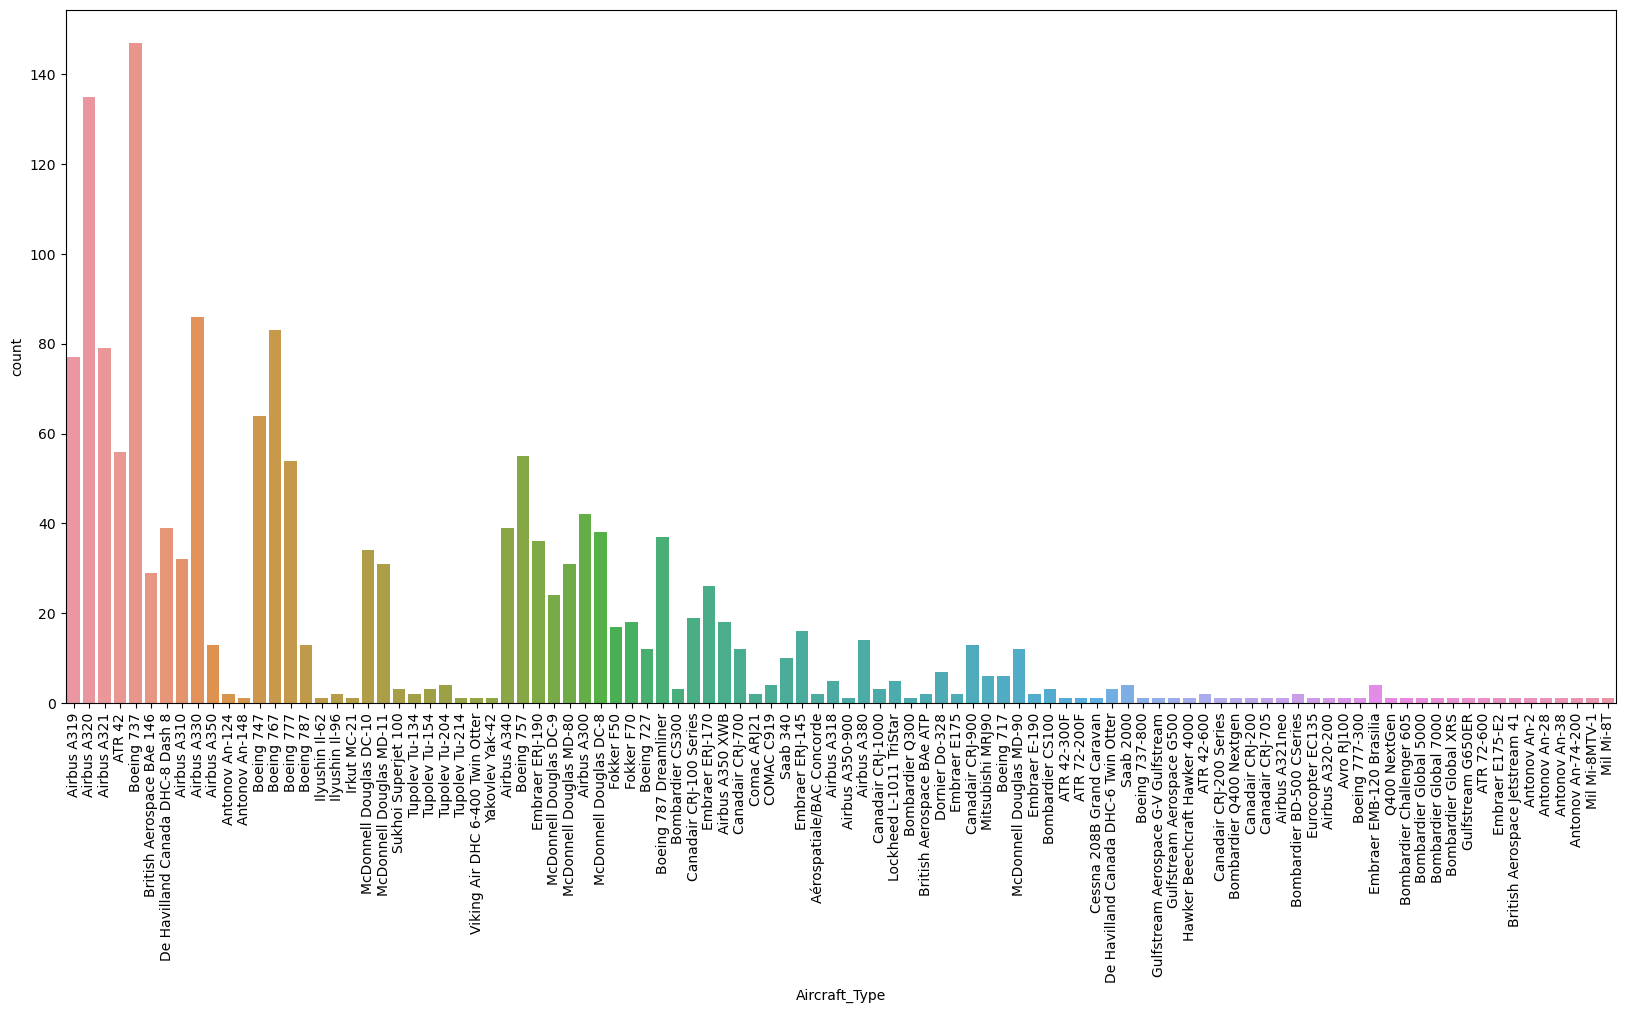

In [59]:
plt.figure(figsize=(20,9))
sb.countplot(x=df.Aircraft_Type)
plt.xticks(rotation=90)
plt.show()

Fleet size variations (current, future, historic)

In [60]:
#fleet variatinon of airlines refers to the number and types of aircraft of airline uses to its flight 
# we are using barplot here to analyze the current fleet variation across parent airline.

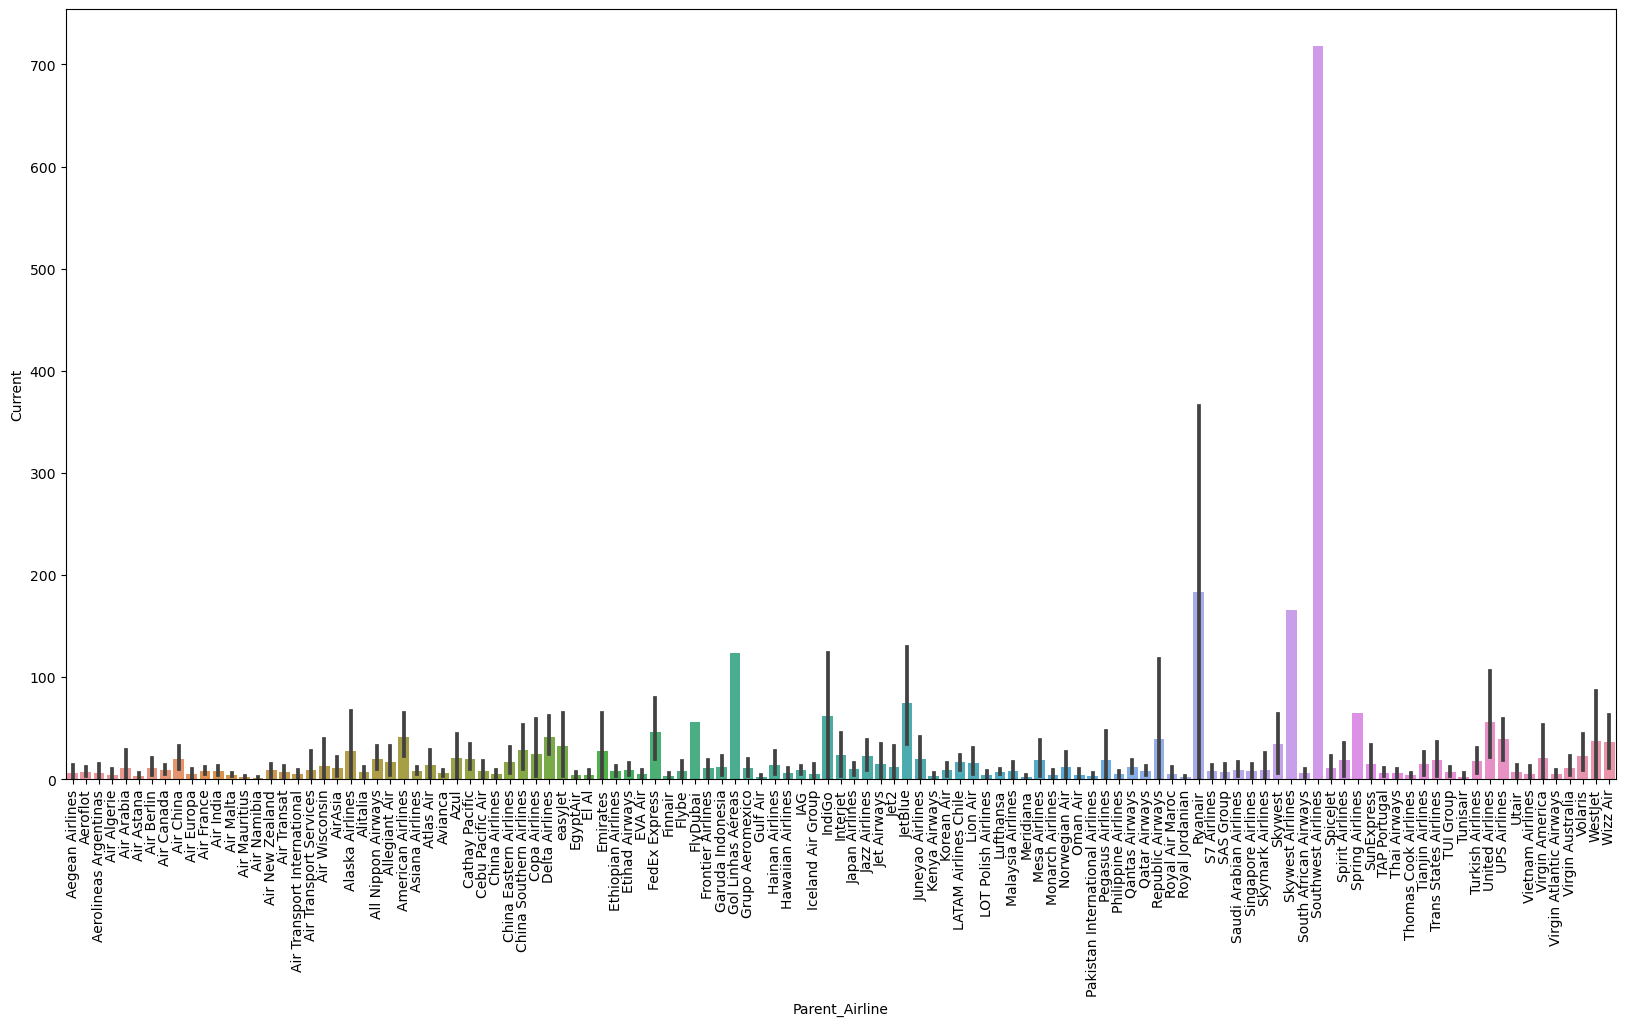

In [61]:
fig=plt.figure(figsize=[20,10])
sb.barplot(x=df.Parent_Airline,y=df.Current)
plt.xticks(rotation=90)
plt.show()

In [62]:
# we are using barplot here to find out the future fleet variation in parent airline

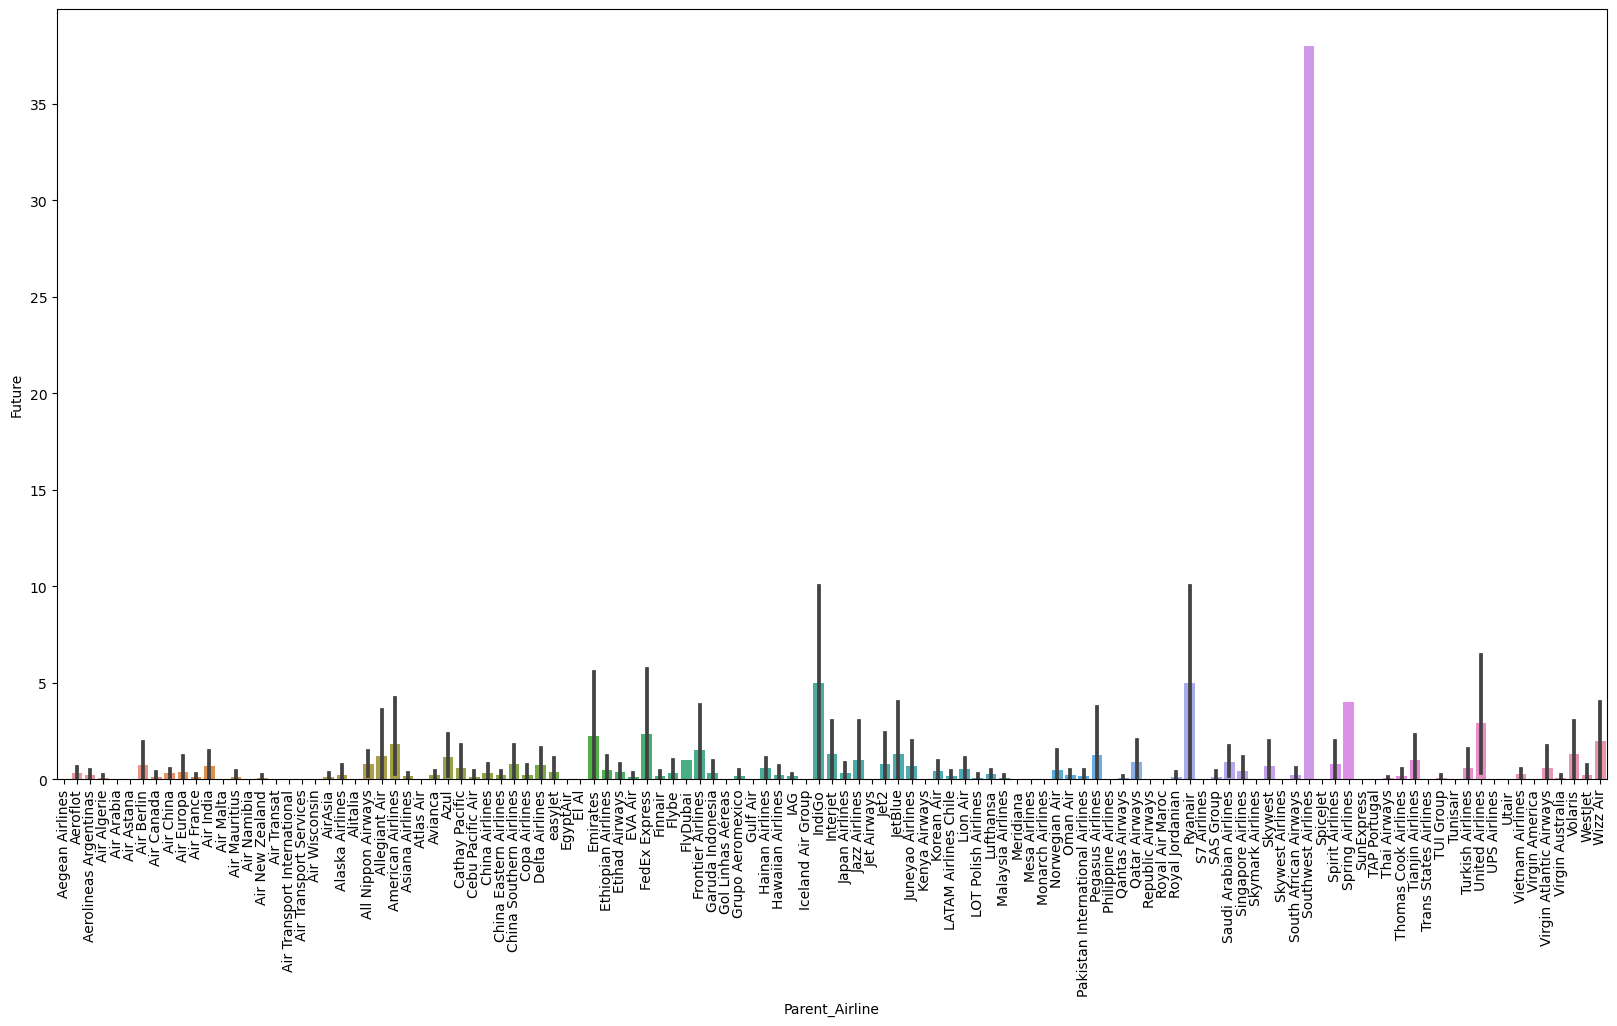

In [63]:
fig=plt.figure(figsize=[20,10])
sb.barplot(x=df.Parent_Airline,y=df.Future)
plt.xticks(rotation=90)
plt.show()

In [64]:
# we are using barplot here to find out the historic fleet variation in parent airline

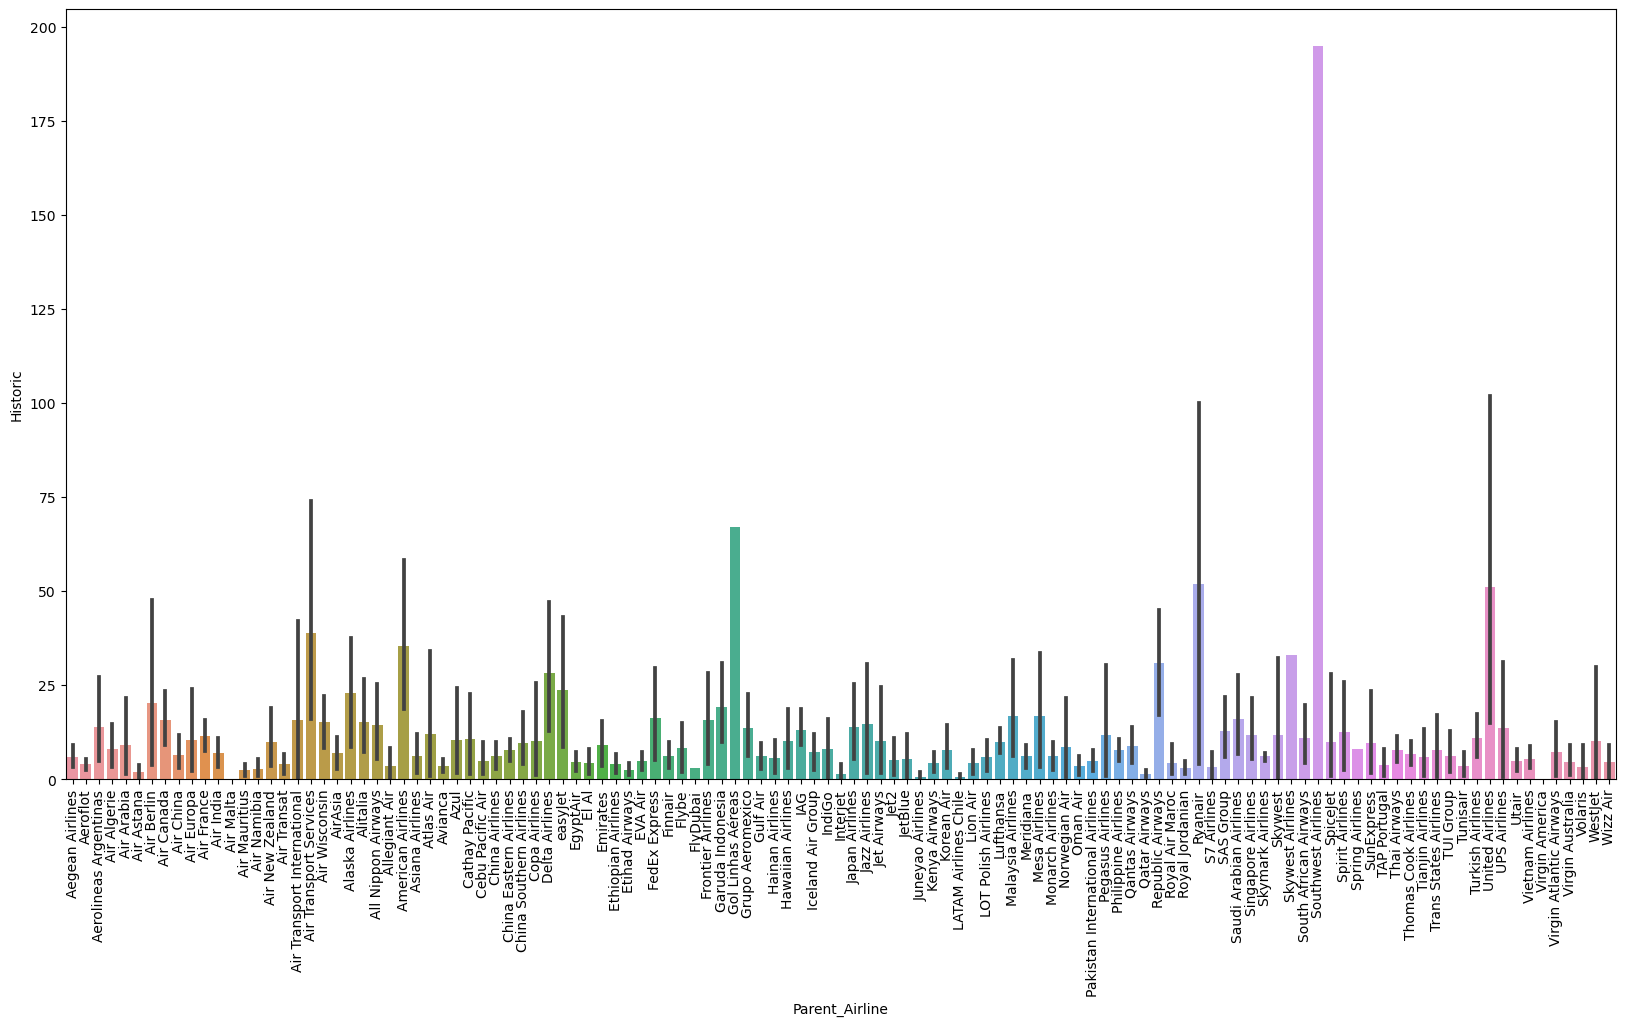

In [65]:
fig=plt.figure(figsize=[20,10])
sb.barplot(x=df.Parent_Airline,y=df.Historic)
plt.xticks(rotation=90)
plt.show()

In [66]:
#here we are showing one more visualition using heatmap for fleet variation of parent airlines(current, future, historic)

In [67]:
xy=df[['Current','Historic','Future']].corr()
print(xy)

           Current  Historic    Future
Current   1.000000  0.382510  0.487534
Historic  0.382510  1.000000  0.103641
Future    0.487534  0.103641  1.000000


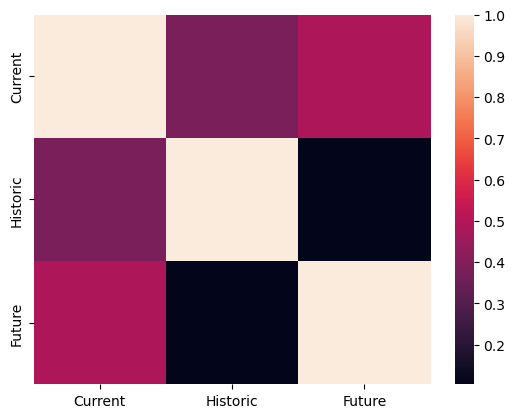

In [68]:
sb.heatmap(xy)
plt.show()


In [69]:
df.dtypes

Parent_Airline    object
Airline           object
Aircraft_Type     object
Current            int64
Future             int64
Historic           int64
Total             object
Orders            object
Unit_Cost         object
Total_Cost        object
Average_Age       object
dtype: object

In [70]:
#we are converting data type object to int using df[column] = pd.to_numeric(df["column"], errors="coerce").fillna(0).astype("int64")

In [71]:
df["Unit_Cost"] = pd.to_numeric(df["Unit_Cost"], errors="coerce").fillna(0).astype("int64")
df["Unit_Cost"]

0        90
1        90
2        98
3        98
4       115
       ... 
1578     73
1579    187
1580     31
1581     98
1582    115
Name: Unit_Cost, Length: 1583, dtype: int64

In [72]:
df["Total_Cost"] = pd.to_numeric(df["Total_Cost"], errors="coerce").fillna(0).astype("int64")
df["Total_Cost"]

0        90
1         0
2         0
3         0
4       919
       ... 
1578      0
1579    748
1580      0
1581      0
1582      0
Name: Total_Cost, Length: 1583, dtype: int64

In [73]:
df["Average_Age"] = pd.to_numeric(df["Average_Age"], errors="coerce").fillna(0).astype("int64")
df["Average_Age"]

0       11
1        0
2        7
3        0
4       10
        ..
1578     0
1579    24
1580     2
1581     5
1582     0
Name: Average_Age, Length: 1583, dtype: int64

In [74]:
df["Total"] = pd.to_numeric(df["Total"], errors="coerce").fillna(0).astype("int64")
df["Total"]

0        4
1        8
2       41
3        9
4        8
        ..
1578     1
1579     4
1580    33
1581    72
1582    15
Name: Total, Length: 1583, dtype: int64

In [75]:
df["Orders"] = pd.to_numeric(df["Orders"], errors="coerce").fillna(0).astype("int64")
df["Orders"]

0         0
1         0
2         0
3         0
4         0
       ... 
1578      0
1579      0
1580      9
1581      8
1582    129
Name: Orders, Length: 1583, dtype: int64

In [76]:
df.dtypes

Parent_Airline    object
Airline           object
Aircraft_Type     object
Current            int64
Future             int64
Historic           int64
Total              int64
Orders             int64
Unit_Cost          int64
Total_Cost         int64
Average_Age        int64
dtype: object

 Cost trends across airlines and aircraft types.

In [77]:
# here we are using the histplot plot to find the cost trend

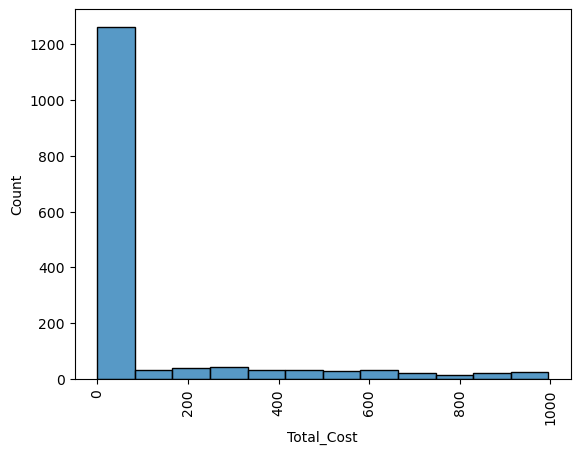

In [79]:
sb.histplot(x=df.Total_Cost)
plt.xticks(rotation=90)
plt.show()

 Age distribution for aircraft types and parent airlines.
 

In [ ]:
#for showing age distribution for aircraft using barplot 

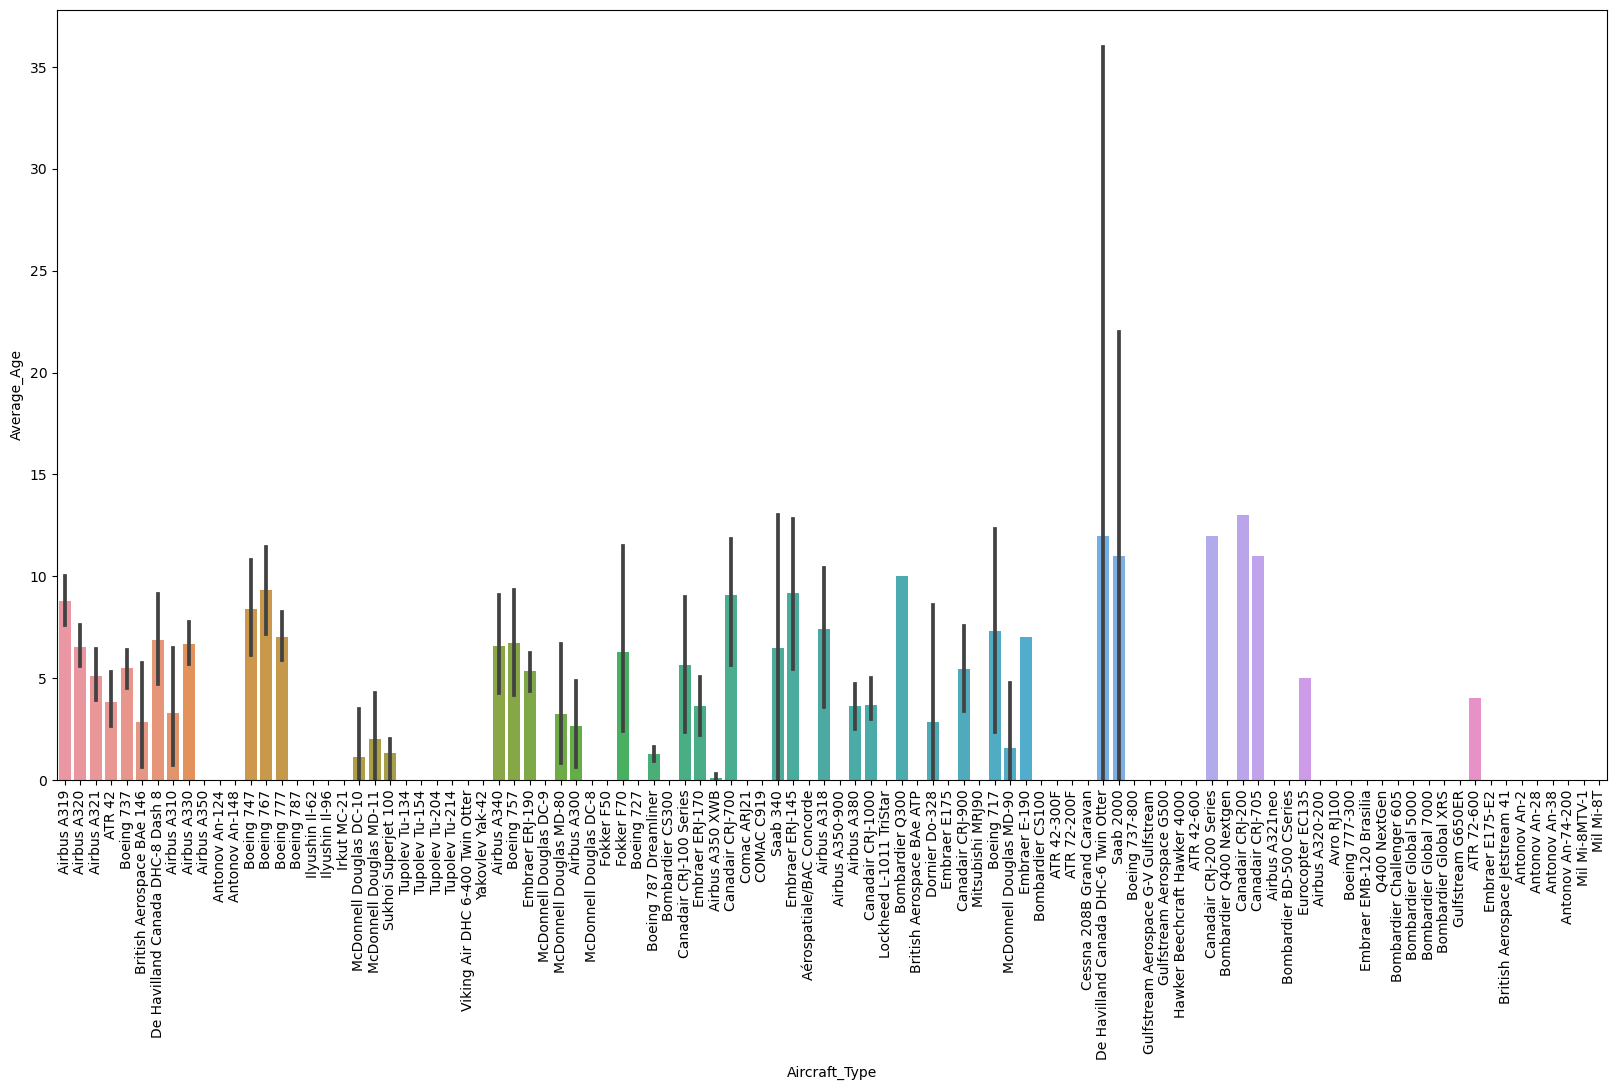

In [81]:
fig=plt.figure(figsize=[20,10])
sb.barplot(x=df.Aircraft_Type,y=df.Average_Age)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#for showing age distribution for parentairline using barplot 

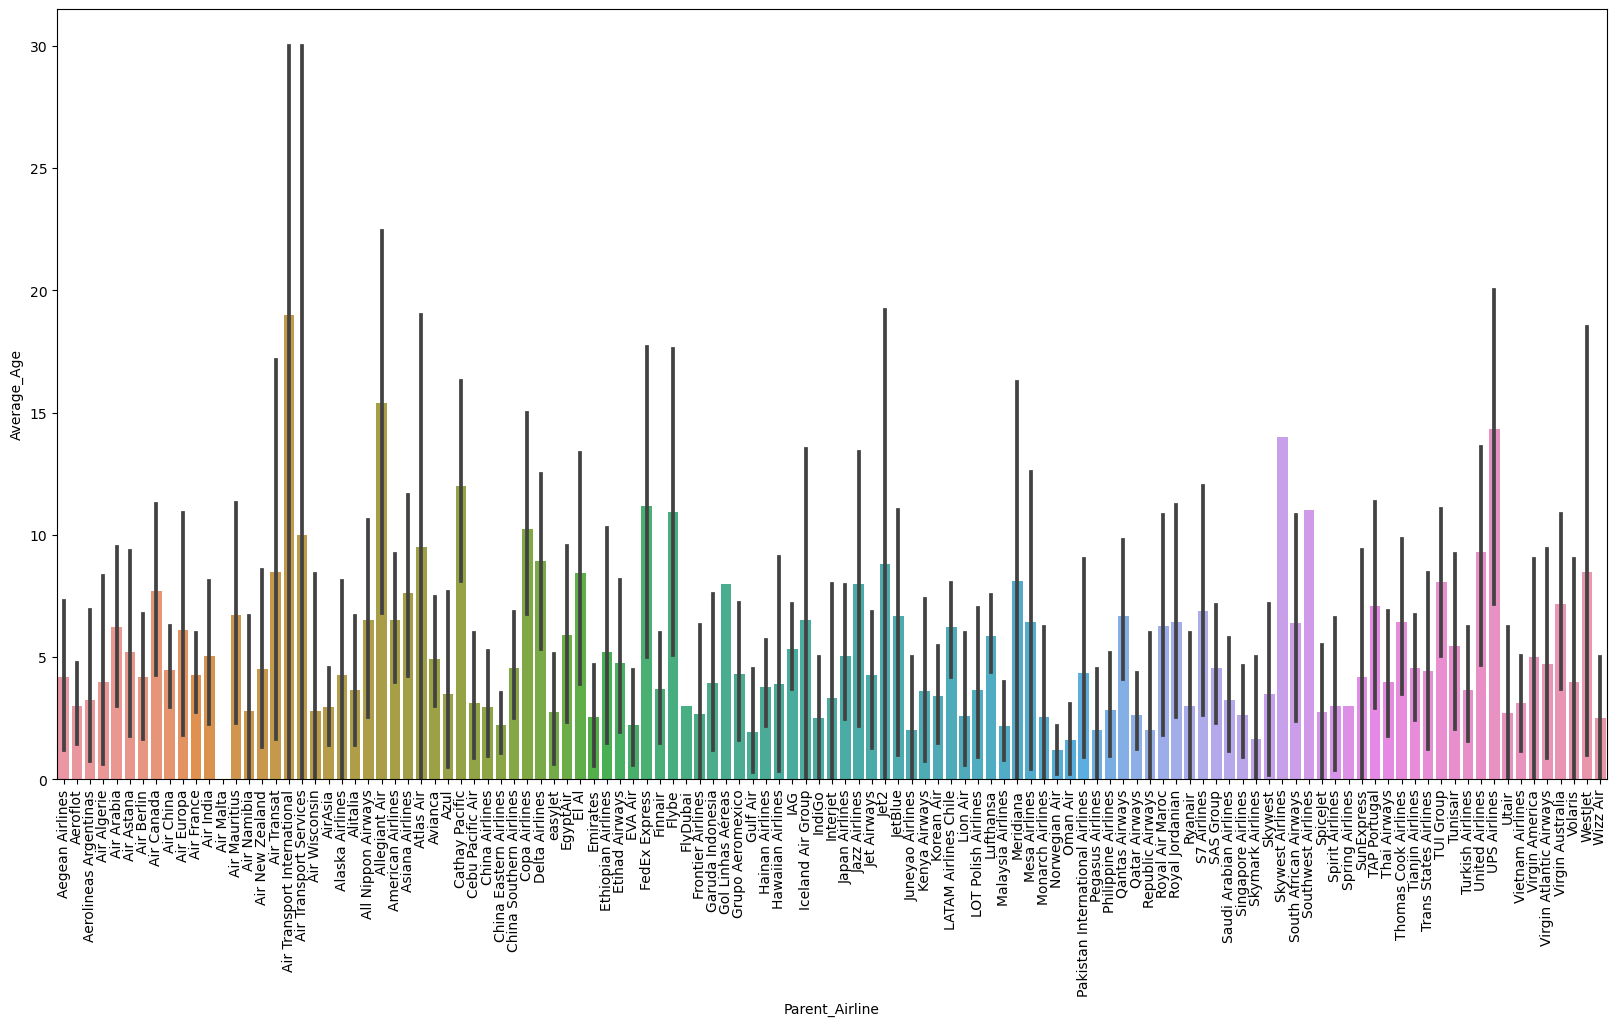

In [82]:
fig=plt.figure(figsize=[20,10])
sb.barplot(x=df.Parent_Airline,y=df.Average_Age)
plt.xticks(rotation=90)
plt.show()

 Relationships (e.g., average age vs. total cost).

In [ ]:
#for showing relationship totalcost vs averageage we are using here lineplot

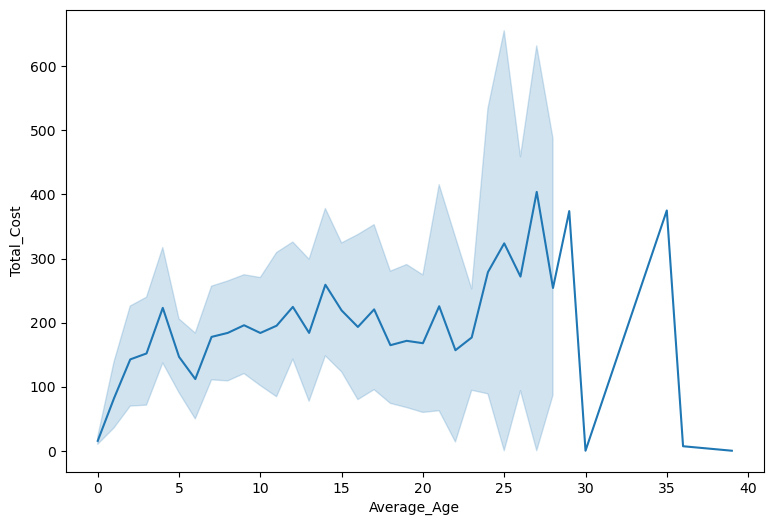

In [87]:
fig=plt.figure(figsize=[9,6])
sb.lineplot(x=df.Average_Age,y=df.Total_Cost)
plt.show()

 Identify the parent airlines with the highest total fleet cost

In [ ]:
# for obtaning the highest total fleet cost in airlines so here we are using groupby function

In [89]:
df.groupby('Parent_Airline')['Total_Cost'].sum().nlargest(10)

Parent_Airline
Lufthansa               8745
Avianca                 7327
Qantas Airways          6261
Thomas Cook Airlines    5704
IAG                     4955
LATAM Airlines Chile    4883
Air France              3995
Hainan Airlines         3800
Cathay Pacific          3478
Aeroflot                3362
Name: Total_Cost, dtype: int64

 Compare unitcosts across different parent airlines and aircraft types.

In [ ]:
#here we are creating a dashboard for comparing unitcosts for parent airlines

In [90]:
print(df.Parent_Airline.unique())
a=input("Enter Parent_Airline name: ")
b=df[df.Parent_Airline==a]
b

['Aegean Airlines' 'Aeroflot' 'Aerolineas Argentinas' 'Air Algerie'
 'Air Arabia' 'Air Astana' 'Air Berlin' 'Air Canada' 'Air China'
 'Air Europa' 'Air France' 'Air India' 'Air Malta' 'Air Mauritius'
 'Air Namibia' 'Air New Zealand' 'Air Transat'
 'Air Transport International' 'Air Transport Services' 'Air Wisconsin'
 'AirAsia' 'Alaska Airlines' 'Alitalia' 'All Nippon Airways'
 'Allegiant Air' 'American Airlines' 'Asiana Airlines' 'Atlas Air'
 'Avianca' 'Azul' 'Cathay Pacific' 'Cebu Pacific Air' 'China Airlines'
 'China Eastern Airlines' 'China Southern Airlines' 'Copa Airlines'
 'Delta Airlines' 'easyJet' 'EgyptAir' 'El Al' 'Emirates'
 'Ethiopian Airlines' 'Etihad Airways' 'EVA Air' 'FedEx Express' 'Finnair'
 'Flybe' 'FlyDubai' 'Frontier Airlines' 'Garuda Indonesia'
 'Gol Linhas Aéreas' 'Grupo Aeromexico' 'Gulf Air' 'Hainan Airlines'
 'Hawaiian Airlines' 'IAG' 'Iceland Air Group' 'IndiGo' 'Interjet'
 'Japan Airlines' 'Jazz Airlines' 'Jet Airways' 'Jet2' 'JetBlue'
 'Juneyao Airlines' '

,Parent_Airline,Airline,Aircraft_Type,Current,Future,Historic,Total,Orders,Unit_Cost,Total_Cost,Average_Age
1390,Thai Airways,Thai Airways,Airbus A300,0,0,35,35,0,75,0,0
1391,Thai Airways,Thai Airways,Airbus A310,0,0,4,4,0,75,0,0
1392,Thai Airways,Thai Smile,Airbus A320,20,0,0,20,0,98,0,3
1393,Thai Airways,Thai Airways,Airbus A320,0,0,5,5,0,98,0,0
1394,Thai Airways,Thai Airways,Airbus A330,17,0,10,27,0,240,0,7
1395,Thai Airways,Thai Airways,Airbus A340,0,0,10,10,0,216,0,0
1396,Thai Airways,Thai Airways,Airbus A350 XWB,2,1,0,3,10,312,624,0
1397,Thai Airways,Thai Airways,Airbus A380,6,0,0,6,0,433,0,4
1398,Thai Airways,Nok Air,ATR 42,2,0,2,4,0,22,44,9
1399,Thai Airways,Thai Airways,ATR 42,0,0,4,4,0,22,0,0


 Analyze future orders and their associated costs.

In [ ]:
# using groupby function here we are Analyze future orders and their associated costs.

In [93]:
b.groupby('Aircraft_Type')[['Future','Unit_Cost']].sum()

,Future,Unit_Cost
Aircraft_Type,,
ATR 42,0,44
Airbus A300,0,75
Airbus A310,0,75
Airbus A320,0,196
Airbus A330,0,240
Airbus A340,0,216
Airbus A350 XWB,1,312
Airbus A380,0,433
Boeing 737,0,148


Investigate correlations between:
  1:-Totalcost and thenumber of orders.
  2:-Averageageandtotal cost.
  3:-Currentfleet size and total cost

In [ ]:
#for obtaining the correlation between total cost and orders we are using here corr() function

In [94]:
df[['Total_Cost','Orders']].corr()

,Total_Cost,Orders
Total_Cost,1.000000,-0.077888
Orders,-0.077888,1.000000


In [ ]:
#for obtaining the correlation between average age and total cost we are using here corr() function

In [95]:
df[['Average_Age','Total_Cost']].corr()

,Average_Age,Total_Cost
Average_Age,1.000000,0.327782
Total_Cost,0.327782,1.000000


In [ ]:
#for obtaining the correlation between current and total cost we are using here corr() function

In [96]:
df[['Current','Total_Cost']].corr()

,Current,Total_Cost
Current,1.00000,-0.04459
Total_Cost,-0.04459,1.00000


 Detectoutliers in unit costs and average age, identifying associated aircraft types
 or airlines

In [ ]:
#assuming dataframe is 'b'

In [102]:

print(b.Aircraft_Type.unique())
c=input("Enter Aircraft_Type name:")
d=b[b.Aircraft_Type==c]
d


['Airbus A300' 'Airbus A310' 'Airbus A320' 'Airbus A330' 'Airbus A340'
 'Airbus A350 XWB' 'Airbus A380' 'ATR 42' 'Boeing 737' 'Boeing 747'
 'Boeing 777' 'Boeing 787 Dreamliner' 'British Aerospace BAe 146'
 'De Havilland Canada DHC-8 Dash 8' 'McDonnell Douglas DC-10'
 'McDonnell Douglas DC-8' 'McDonnell Douglas DC-9'
 'McDonnell Douglas MD-11']
Enter Aircraft_Type name:Airbus A310


,Parent_Airline,Airline,Aircraft_Type,Current,Future,Historic,Total,Orders,Unit_Cost,Total_Cost,Average_Age
1391,Thai Airways,Thai Airways,Airbus A310,0,0,4,4,0,75,0,0


Detect outliers in unit costs and average age, identifying associated aircraft types
or airlines

In [ ]:
#here we detect the outlier in unit cost associated aircraft types using describe function

In [103]:
df.groupby('Aircraft_Type')['Unit_Cost'].describe()

,count,mean,std,min,25%,50%,75%,max
Aircraft_Type,,,,,,,,
ATR 42,56.0,21.607143,2.939874,0.0,22.0,22.0,22.0,22.0
ATR 42-300F,1.0,20.000000,NaN,20.0,20.0,20.0,20.0,20.0
ATR 42-600,2.0,20.000000,0.000000,20.0,20.0,20.0,20.0,20.0
ATR 72-200F,1.0,25.000000,NaN,25.0,25.0,25.0,25.0,25.0
ATR 72-600,1.0,25.000000,NaN,25.0,25.0,25.0,25.0,25.0
...,...,...,...,...,...,...,...,...
Tupolev Tu-154,3.0,16.000000,0.000000,16.0,16.0,16.0,16.0,16.0
Tupolev Tu-204,4.0,16.000000,0.000000,16.0,16.0,16.0,16.0,16.0
Tupolev Tu-214,1.0,16.000000,NaN,16.0,16.0,16.0,16.0,16.0


In [104]:
df[df['Aircraft_Type'] == 'Airbus A320']['Unit_Cost'].describe()

count    135.000000
mean      95.822222
std       14.499545
min        0.000000
25%       98.000000
50%       98.000000
75%       98.000000
max       98.000000
Name: Unit_Cost, dtype: float64

In [105]:
df[df['Aircraft_Type'] == 'Airbus A320']['Average_Age'].describe()

count    135.000000
mean       6.540741
std        5.924605
min        0.000000
25%        1.500000
50%        6.000000
75%       10.000000
max       25.000000
Name: Average_Age, dtype: float64

In [ ]:
#here we detect the outlier in unit cost associated airline using describe function

In [106]:
df[df['Airline'] == 'Air India']['Average_Age'].describe()


count    14.000000
mean      4.571429
std       6.925030
min       0.000000
25%       0.000000
50%       0.000000
75%       7.750000
max      21.000000
Name: Average_Age, dtype: float64

In [107]:
df[df['Airline'] == 'Air India']['Unit_Cost'].describe()

count     14.000000
mean     149.928571
std       97.702424
min        6.000000
25%       75.000000
50%      106.500000
75%      227.500000
max      316.000000
Name: Unit_Cost, dtype: float64